In [1]:
from pathlib import Path
import os

# Project root (where notebook is)
ROOT = Path.cwd()

# Force Keras cache into project folder
KERAS_HOME = ROOT / "data" / "keras"
KERAS_HOME.mkdir(parents=True, exist_ok=True)
os.environ["KERAS_HOME"] = str(KERAS_HOME)


In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential , layers
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [3]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [4]:
model = Sequential()
model.add(layers.Rescaling(1./255))
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
conv_base.trainable = False

In [6]:
data_dir = Path("data")
data_dir =data_dir / "cats_vs_dogs"

img_size = (150, 150)
batch_size = 64

dataset = keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

class_names = dataset.class_names
print("Classes:", class_names)


Found 24998 files belonging to 2 classes.
Classes: ['Cat', 'Dog']


In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
num_samples = 100
batch_size = 32
steps_per_epoch = ((num_samples + batch_size - 1)*12 )// batch_size  # ceil division

history = model.fit(dataset, epochs=2, steps_per_epoch=steps_per_epoch)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.7946 - loss: 0.5096 
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.8788 - loss: 0.2710


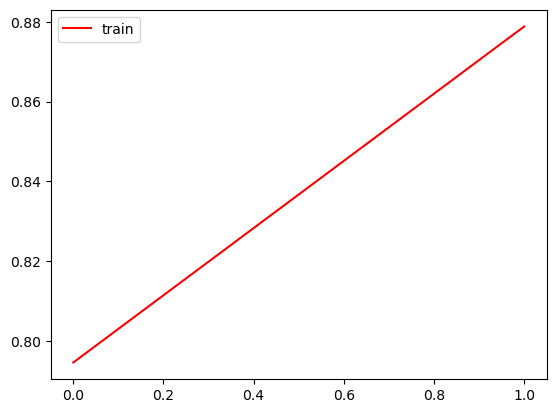

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.legend()
plt.show()

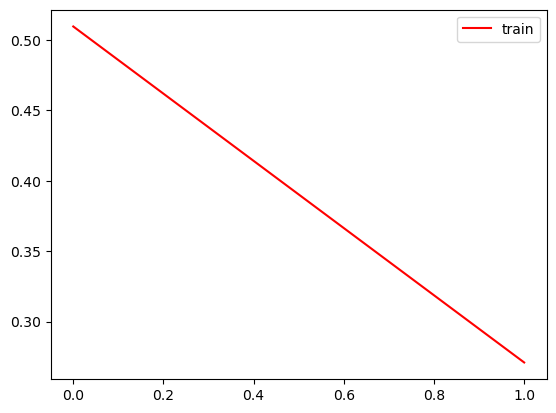

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.legend()
plt.show()